# Project notebook

The imports for the project

In [4]:
import pandas
import matplotlib.pyplot as plt
import math
import os
import numpy as np

import data_preprocessing

Code to automatically download and organise data. **WARNING**: Can take a while

- dublin_weather() and dublin_bss() downloads the data CSVs from their respective websites
- organise_by_station() reorganises the data into CSVs by station, instead of by quarter.
- clean_weather_data() removes unnecessary info from the weather data CSV

Fairly unintersting code

In [5]:
data_preprocessing.dublin_weather()
data_preprocessing.dublin_bss()

data_preprocessing.organise_by_station()
data_preprocessing.clean_weather_data()

100%|███████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 10000.72it/s]

Dublin weather data already exists

Finished downloading Dublin BSS data
Starting dublinbikes reorganisation

Finished dublinbikes reorganisation


Function to convert the time in the TIME field to an int representing when in the day it is. And a function to extract the date only from the TIME field.

average_day() takes the station number to plot, and then calculates the average population of the station over the course of a day

In [6]:
def convert_time(x):
    """
    Converts TIME field in the CSV to an integer representing
    what time of day it is (in number of 5min increments) from 0 to 287
    eg
    - 00:00 -> 0
    - 00:10 -> 2
    - 02:20 -> 28
    etc
    """
    a = x.split(' ')
    a = a[1].split(':')

    ans = math.floor((int(a[0]) * 12) + (int(a[1]) / 5))

    return ans


def extract_date(x):
    return x.split(' ')[0]


def extract_year(x):
    return x.split(' ')[0].split('-')[0]


def plot_average_day(station, year=0):
    """
    Plots the average population of a station over time
    (so the average of a station at a certain time of day)
    """
    filename = './datasets/bss/dublin/reorg/station_' + str(station) + '.csv'

    if not os.path.exists(filename):
        print("Station file " + str(station) + " does not exist")
        return

    dataset = pandas.read_csv(filename, usecols=['TIME', 'AVAILABLE BIKES'])
    dataset['INT_TIME'] = dataset['TIME'].apply(lambda x: convert_time(x))
    dataset['DATE'] = dataset['TIME'].apply(lambda x: extract_date(x))
    dataset['YEAR'] = dataset['TIME'].apply(lambda x: extract_year(x))

    # Calculating average pop at all times during the day

    time_total = {}
    time_count = {}

    times = dataset['INT_TIME'].unique()
    times.sort()

    # fill dict
    for time in times:
        time_total[time] = 0
        time_count[time] = 0

    if year != 0:
        dataset = dataset.loc[dataset['YEAR'] == str(year)]
        if len(dataset) == 0:
            print("No data exists for " + str(year))
            return

    for i, row in dataset.iterrows():
        time_total[row['INT_TIME']] = time_total[row['INT_TIME']] + row['AVAILABLE BIKES']
        time_count[row['INT_TIME']] = time_count[row['INT_TIME']] + 1

    averages = [x / y for x, y in zip(time_total.values(), time_count.values())]

    label = 'S' + str(station)
    if year != 0:
        label = label + ',' + str(year)

    plt.plot(times, averages, label=label)


def show_average_day_plot():
    plt.xlabel('Time')
    plt.ylabel('Available bikes')

    x = [0, 48, 96, 144, 192, 240, 288]
    labels = ['00:00', '04:00', '08:00', '12:00', '16:00', '20:00', '24:00']
    plt.xticks(x, labels)
    
    #Comment this out to disable legend
    plt.legend()
    
    plt.show()

Calls average_day() on a station CSV and opens the graph

2
3
4
5


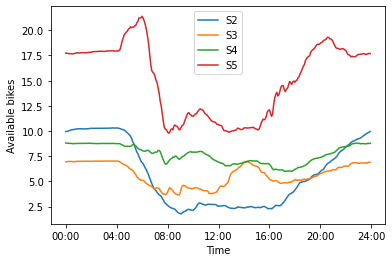

In [7]:
###This code plots ALL stations on the same graph
# stations = pandas.read_csv("./datasets/bss/dublin/dublin.csv", usecols=["Number"])
# for station in stations['Number']:
#     plot_average_day(station)
    
###This code plots all stations in the range (2-5 inclusive)
for x in range(2, 6):
    print(x)
    plot_average_day(x)

###This code plots the average population for a given station in 2018, 2019 and 2020 respectively
# station = 3
# plot_average_day(station, 2018)
# plot_average_day(station, 2019)
# plot_average_day(station, 2020)

show_average_day_plot()

### Evaluating the impact of 2020 on the dataset

Thanks to the pandemic, 2020 has been a very unique year in all aspects of life, including affecting the useage of BSSs. To combat this, I must analyse the impact 2020 has on the dataset in question.

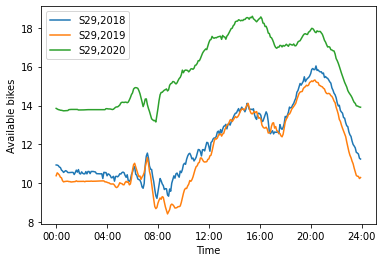

In [8]:
#Ormond Quay Upper
station = 29
plot_average_day(station, 2018)
plot_average_day(station, 2019)
plot_average_day(station, 2020)

show_average_day_plot()

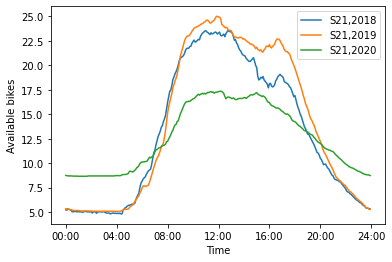

In [9]:
#Leinster Street South
station = 21
plot_average_day(station, 2018)
plot_average_day(station, 2019)
plot_average_day(station, 2020)

show_average_day_plot()

As seen here the averages for 2020 are different to trends from the previous two years, (generally being a less volatile graph overall). The following code quantifys the average difference between 2018/2019 and 2020.

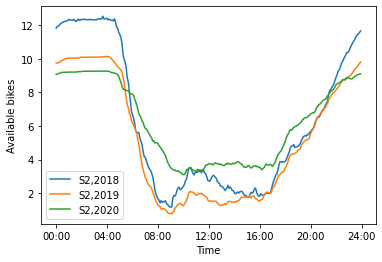

In [10]:
plot_average_day(2, 2018)
plot_average_day(2, 2019)
plot_average_day(2, 2020)

show_average_day_plot()

In [ ]:
def average_dif_2020(station):    
    """
    Plots the average difference of a station over time between pandemic
    and non-pandemic times
    """
    filename = './datasets/bss/dublin/reorg/station_' + str(station) + '.csv'

    if not os.path.exists(filename):
        print("Station file " + str(station) + " does not exist")
        return 0

    dataset = pandas.read_csv(filename, usecols=['TIME', 'AVAILABLE BIKES'])
    dataset['INT_TIME'] = dataset['TIME'].apply(lambda x: convert_time(x))
    dataset['DATE'] = dataset['TIME'].apply(lambda x: extract_date(x))
    dataset['YEAR'] = dataset['TIME'].apply(lambda x: extract_year(x))

    # Calculating average pop at all times during the day

    time_total = {}
    time_count = {}

    times = dataset['INT_TIME'].unique()
    times.sort()

    # fill dict
    for time in times:
        time_total[time] = 0
        time_count[time] = 0

    dataset2020 = dataset.loc[dataset['YEAR'] == str(2020)]

    for i, row in dataset2020.iterrows():
        time_total[row['INT_TIME']] = time_total[row['INT_TIME']] + row['AVAILABLE BIKES']
        time_count[row['INT_TIME']] = time_count[row['INT_TIME']] + 1

    averages_2020 = [x / y for x, y in zip(time_total.values(), time_count.values())]

    for time in times:
        time_total[time] = 0
        time_count[time] = 0

    dataset_norm = dataset.loc[dataset['YEAR'] != str(2020)]

    for i, row in dataset_norm.iterrows():
        time_total[row['INT_TIME']] = time_total[row['INT_TIME']] + row['AVAILABLE BIKES']
        time_count[row['INT_TIME']] = time_count[row['INT_TIME']] + 1

    averages_norm = [x / y for x, y in zip(time_total.values(), time_count.values())]

    differences = [x - y for x, y in zip(averages_2020, averages_norm)]

    differences = [abs(x) for x in differences]

    return sum(differences)/len(differences)

averages = []

stations = range(2, 20)

for station in stations:
    print(station)
    averages.append(average_dif_2020(station))


2
3


In [ ]:
y_pos = np.arange(len(stations))
performance = averages

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Average pop')

plt.show()

In [ ]:
averages = []
stations = pandas.read_csv("./datasets/bss/dublin/dublin.csv", usecols=["Number"])
for station in stations['Number']:
    average_dif_2020(station)

### LSTM Training